# The Famous Lighthouse Problem

Described initially by Steve Gull and supposedly given to undergraduates at Cambridge (he told me that was a white lie!), this excellent bayesian inference problem tries to find a lighthouse off the shore of a coast. 

A likelihood is defined, and then simply sampled to find the maximum negative log likelihood. This shows how remarkably easy bayesian inference is. Deriving a likelihood is the difficult part.

9.84381602385


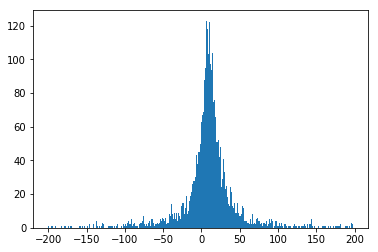

In [135]:
## Sivia Chapter 3!

import numpy
import matplotlib.pyplot as plt
from scipy.optimize import minimize

lighthouse_position_b = 12 #We know the distance from the coast.
lighthouse_position_a = 10 #True position along coast (what we will infer)

## Draw samples from a cauchy distribution
s =lighthouse_position_a + lighthouse_position_b*numpy.random.standard_cauchy(10000)
s = s[(s>-200) & (s<200)]
print(s.mean())
plt.hist(s, bins=1000)
plt.show()

In [136]:
## Lets use log likelihoods
def calculate_likelihood(a,b,data):
    return numpy.sum(numpy.log( b / (numpy.square(b) + numpy.square(data - a))))
        
#vector_L = numpy.vectorize(calculate_likelihood)
print(calculate_likelihood(19.7, 1, s)) # Seems reasonable!

## Brute Force maximum...

a_potential = numpy.arange(-20,20,0.1)
likelihoods = numpy.empty(shape=(0,1))
for a in a_potential:
    likelihoods = numpy.insert(likelihoods,0,calculate_likelihood(a,10, s))

print(likelihoods.max())
argmax = likelihoods.argmax()
print(20 - (argmax+1) * 0.1)
#numpy.fmax(calculate_likelihood(a_potential, lighthouse_position_b, s))

-50910.5637289
-34765.9182602
9.9
